# 2層ニューラルネットワークで単純な回帰問題を解く

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from common.activations import softmax, sigmoid
from common.grad import numerical_gradient
from common.loss import mean_squared_error

## 2層ニューラルネットワーククラスの改良

### [演習]
* 2層ニューラルネットワーククラスを回帰問題用に改良しましょう

In [2]:
class TwoLayerNet():
    def __init__(self, input_size, hidden_size, output_size):
        
        # 重みの初期化
        self.params = {}
        init_std=0.01
        np.random.seed(1234)
        self.params["W1"] = init_std * np.random.randn(input_size, hidden_size)
        self.params["b1"] = np.zeros(hidden_size)
        self.params["W2"] = init_std * np.random.randn(hidden_size, output_size)
        self.params["b2"] = np.zeros(output_size)
                
    def predict(self, x):
        """
        x : 入力データ
        """
        W1, W2 = self.params["W1"], self.params["W2"]
        b1, b2 = self.params["b1"], self.params["b2"]
        
        h1 = np.dot(x, W1) + b1
        z1 = sigmoid(h1)
#         z1 = h1
        h2 = np.dot(z1, W2) + b2
#         y = softmax(h2)
        y = h2
        return y
    
    def loss(self, x, t):
        """
        x : 入力データ
        t : 正解データ
        """
        y = self.predict(x)
#         loss = cross_entropy_error(y, t)
        loss = mean_squared_error(y, t)
        return loss
    
    def gradient(self, x, t):
        def f(W):
            return self.loss(x,t)
        grads={}
        grads["W1"] = numerical_gradient(f, self.params["W1"])
        grads["b1"] = numerical_gradient(f, self.params["b1"])
        grads["W2"] = numerical_gradient(f, self.params["W2"])
        grads["b2"] = numerical_gradient(f, self.params["b2"])
        return grads

### [演習]
* 2層ニューラルネットワークを計算するクラスを実装しましょう

## データの生成

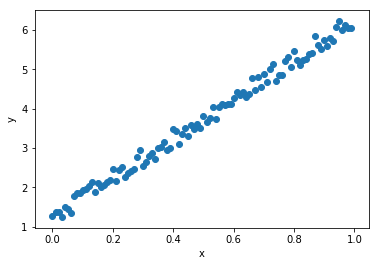

In [3]:
a = 5
b = 1
x = np.arange(0, 1, 0.01).reshape(1,-1)
error = np.random.rand(x.size) * 0.5
y = a * x + b + error
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## バッチ学習

### [演習]
* 以下のNNにおける重み更新演算を完成させましょう

In [4]:
x = x.reshape(-1, 1)
t = y.reshape(-1, 1)

iters_num = 10000
lr = 0.01

tnet = TwoLayerNet(input_size=1, hidden_size=1, output_size=1)

li_loss = []
for i in range(iters_num):
    # 勾配の計算
    grads = tnet.gradient(x, t)

    # パラメータの更新
    for key in tnet.params.keys():
#         print(key)
        tnet.params[key] -= lr * grads[key]
        
    # 学習経過の記録
    loss = tnet.loss(x, t)
    li_loss.append(loss)

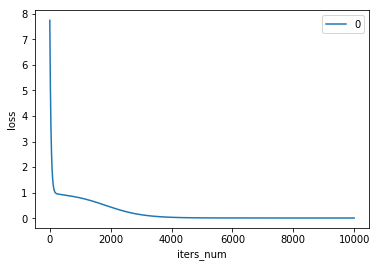

In [5]:
# lossのグラフ化
pd.DataFrame(li_loss).plot()
plt.ylabel("loss")
plt.xlabel("iters_num")
plt.show()

W1= [[4.31]]
b1= [-2.22]
W2= [[5.47]]
b2= [1.05]
mse= 0.014768591768238972


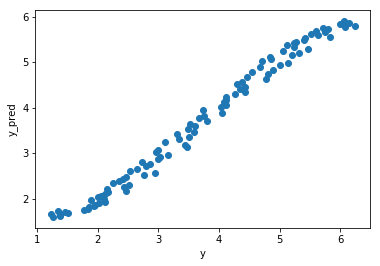

In [6]:
# 最終重みの確認
print("W1=", tnet.params["W1"].round(2))
print("b1=", tnet.params["b1"].round(2))
print("W2=", tnet.params["W2"].round(2))
print("b2=", tnet.params["b2"].round(2))

# 訓練精度の確認
y_pred = tnet.predict(x)
print("mse=",mean_squared_error(y_pred, t))

# 学習データと予測データの比較
plt.scatter(y, y_pred)
plt.xlabel("y")
plt.ylabel("y_pred")
plt.show()

## ミニバッチ学習

### [演習]
* 以下のミニバッチ学習を完成させましょう

In [7]:
# ヒント
batch_size = 30
xsize = 100

# 繰り返し回数
iter_num = np.ceil(xsize / batch_size).astype(np.int)

# シャッフル
idx = np.arange(xsize)
np.random.shuffle(idx)

for i in range(iter_num):
    """
    ランダムなミニバッチを順番に取り出す
    """
    mask = idx[batch_size*i:batch_size*(i+1)]
    print(mask)
    x[mask]
    

[56 71 40 54 51 29 96 66 91 39 53 89 63 98 92 84 52 42 17 27  1 74 77  9
 62 35 32 33 64 70]
[78 95 61 48  4 79 10 59 97  5 83 36  7 87 82 81 68 21 18 85 86 90 55 22
  6 44  8 41 16 45]
[20 25 88 57 31 72 13 28 46 60 14 65 12 19  2  3 75  0 11 67 38 34 37 99
 50 47 73 80 69 58]
[94 93 43 30 26 23 49 15 24 76]


In [8]:
x = x.reshape(-1, 1)
t = y.reshape(-1, 1)

epochs = 1000
batch_size = 20
lr = 0.01

# 繰り返し回数
xsize = x.shape[0]
iter_num = np.ceil(xsize / batch_size).astype(np.int)

# 2層NNのオブジェクト生成
tnet = TwoLayerNet(input_size=1, hidden_size=1, output_size=1)

li_loss = []
for epoch in range(epochs):
    
    # シャッフル
    idx = np.arange(xsize)
    np.random.shuffle(idx)

    for it in range(iter_num):
        """
        ランダムなミニバッチを順番に取り出す
        """
        mask = idx[batch_size*it : batch_size*(it+1)]
    
        # ミニバッチの生成
        x_train = x[mask]
        t_train = t[mask]
        
        # 勾配の計算
        grads = tnet.gradient(x_train, t_train)

        # パラメータの更新
        for key in tnet.params.keys():
    #         print(key)
            tnet.params[key] -= lr * grads[key]

    # 学習経過の記録
    loss = tnet.loss(x, t)
    li_loss.append(loss)

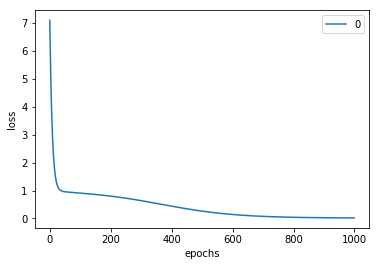

In [9]:
# lossのグラフ化
pd.DataFrame(li_loss).plot()
plt.ylabel("loss")
plt.xlabel("epochs")
plt.show()

[[4.24]]
[-2.13]
[[5.16]]
[1.17]
mse= 0.019862577524950173


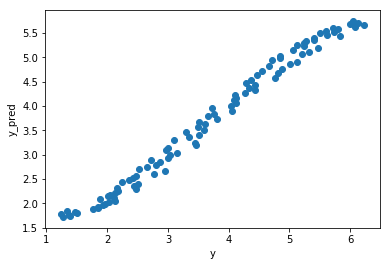

In [10]:
# 最終重みの確認
print(tnet.params["W1"].round(2))
print(tnet.params["b1"].round(2))
print(tnet.params["W2"].round(2))
print(tnet.params["b2"].round(2))

# 訓練精度の確認
y_pred = tnet.predict(x)
print("mse=",mean_squared_error(y_pred, t))

# 学習データと予測データの比較
plt.scatter(y, y_pred)
plt.xlabel("y")
plt.ylabel("y_pred")
plt.show()

### [演習]
* バッチ学習の結果とミニバッチ学習の結果を比較してみましょう
* 中間層に活性化関数を設定した場合としない場合を比較してみましょう